In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False

from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM


In [ ]:
def rbm_gibbs_sample_image(rbm, im, steps):
  assert len(im.shape) < 3
  if len(im.shape) == 2:
    rows = im.shape[0]
    cols = im.shape[1]
    im = im.reshape((-1))
  else:
    im = im.copy()
  for _ in range(steps):
    im = rbm.gibbs(im)
    if len(im.shape) == 2:
      if rows is not None and cols is not None:
        im = im.reshape((rows, cols))
  return im.astype('float32')

def image_palette(X, nr = None, m = 20):
  if nr is None:
    nr = X.shape[0]
  return np.rollaxis(np.rollaxis(X[0:nr].reshape(m, -1, 28, 28), 0, 2), 1, 3).reshape(-1, m * 28)

def remove_rows(X, start, end):
  X = X.copy()
  if len(X.shape) == 2:
    X[start:end] = 0
  elif len(X.shape) == 3:
    X[:,start:end] = 0
  return X

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_test = X_test[0:100]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(-0.5, 559.5, 139.5, -0.5)

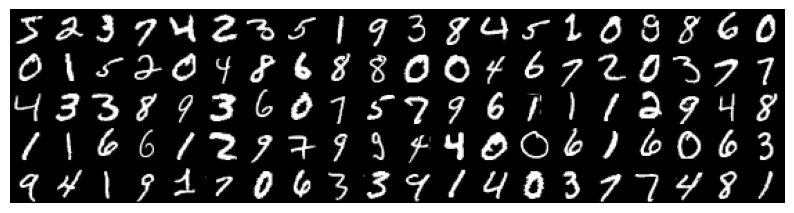

In [ ]:
flattened_images = image_palette(X_train, 100)
plt.figure(figsize=(10,20))
plt.imshow(flattened_images)
plt.axis('off')


In [ ]:
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, random_state=0, n_iter=10, verbose=True)
rbm.fit(X_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 3.49s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 2.80s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 2.77s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 2.84s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 4.53s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.83, time = 2.88s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.32, time = 2.84s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.71, time = 2.79s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.04, time = 3.91s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.61, time = 3.42s


BernoulliRBM(learning_rate=0.01, n_components=10, random_state=0, verbose=True)

In [ ]:

# It trains multiple RBMs, each with a different set of parameters.

param_sets = [
    {'n_components': 10, 'learning_rate': 0.01, 'n_iter': 10},
    {'n_components': 32, 'learning_rate': 0.01, 'n_iter': 20},
    {'n_components': 64, 'learning_rate': 0.1,  'n_iter': 50},
    {'n_components': 256, 'learning_rate': 0.01, 'n_iter': 200}
]

trained_rbms = []

for params in param_sets:
    print(f"Training RBM with n_components={params['n_components']}, learning_rate={params['learning_rate']}, n_iter={params['n_iter']}")
    rbm_test = BernoulliRBM(n_components=params['n_components'],
                            learning_rate=params['learning_rate'],
                            random_state=0,
                            n_iter=params['n_iter'],
                            verbose=True)
    rbm_test.fit(X_train)
    trained_rbms.append((params, rbm_test))










































Training RBM with n_components=10, learning_rate=0.01, n_iter=10
[BernoulliRBM] Iteration 1, pseudo-likelihood = -196.74, time = 2.48s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -196.54, time = 2.87s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.54, time = 3.59s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -196.41, time = 3.87s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -196.40, time = 2.81s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -188.83, time = 2.84s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -187.32, time = 2.83s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -186.71, time = 4.65s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -187.04, time = 3.15s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.61, time = 2.78s
Training RBM with n_components=32, learning_rate=0.01, n_iter=20
[BernoulliRBM] Iteration 1, pseudo-likelihood = -172.19, time = 3.75s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -151.46, time = 5.64s
[BernoulliRBM] Iteration 3, p

In [ ]:
rbm = trained_rbms[3][1]

(-0.5, 559.5, 139.5, -0.5)

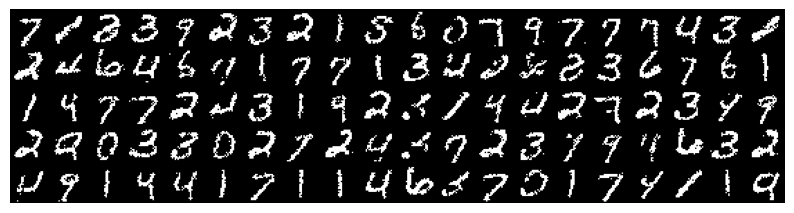

In [ ]:
gibbs_steps = 50
a = X_test.copy()
for i in range(a.shape[0]):
  for j in range(gibbs_steps):
    a[i] = rbm.gibbs(a[i])
plt.figure(figsize=(10,20))
plt.imshow(image_palette(a))
plt.axis('off')

(-0.5, 559.5, 139.5, -0.5)

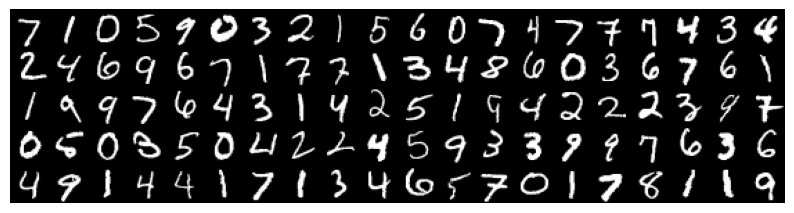

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(image_palette(X_test))
plt.axis('off')


Reconstruction with gibbs_steps = 10


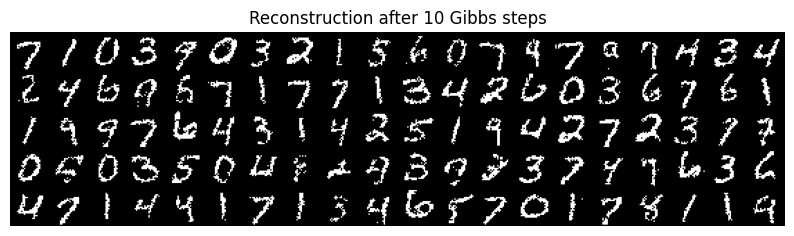

Reconstruction with gibbs_steps = 50


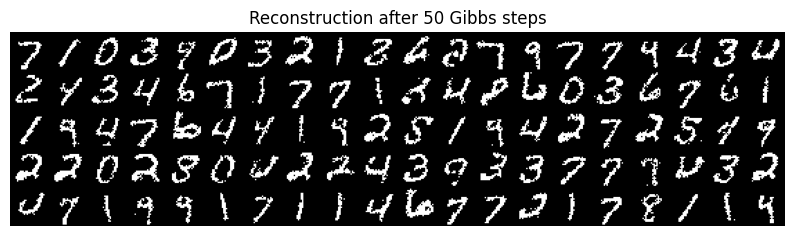

Reconstruction with gibbs_steps = 100


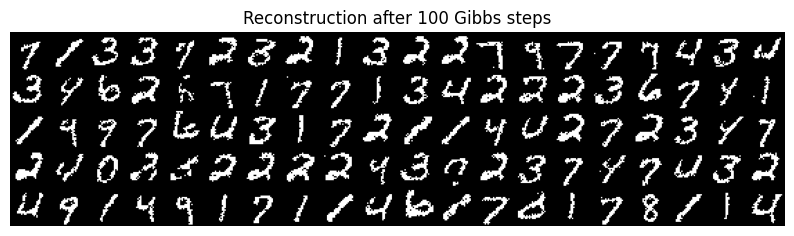

In [ ]:
# It uses the already selected RBM (rbm) and performs reconstructions of the test images with different numbers of Gibbs sampling steps.
gibbs_steps_values = [10, 50, 100]
for gs in gibbs_steps_values:
    print(f"Reconstruction with gibbs_steps = {gs}")
    a = X_test.copy()
    for i in range(a.shape[0]):
        for j in range(gs):
            a[i] = rbm.gibbs(a[i])
    plt.figure(figsize=(10,20))
    plt.imshow(image_palette(a))
    plt.title(f"Reconstruction after {gs} Gibbs steps")
    plt.axis('off')
    plt.show()

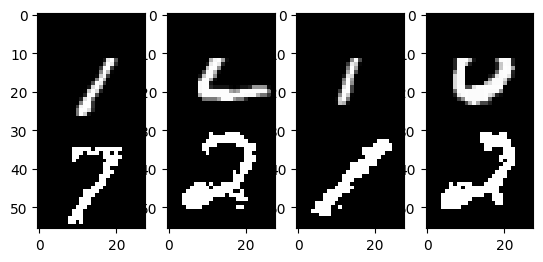

In [ ]:
reconstruction_gibbs_steps = 100
start_test_index = 0
nr = 4
start_row_to_remove = 0
end_row_to_remove = 12
to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
to_reconstruct = remove_rows(to_reconstruct, start_row_to_remove, end_row_to_remove)
reconstructed = np.zeros(to_reconstruct.shape)
for i in range(nr):
  reconstructed[i] = rbm_gibbs_sample_image(rbm, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))
combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
fig = plt.figure()
for i in range(nr):
  ax1 = fig.add_subplot(1,nr,i+1)
  ax1.imshow(combined_images[i])

plt.show()


Removing rows 0 to 12


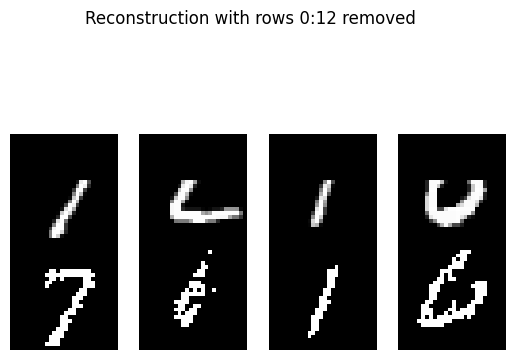

Removing rows 8 to 20


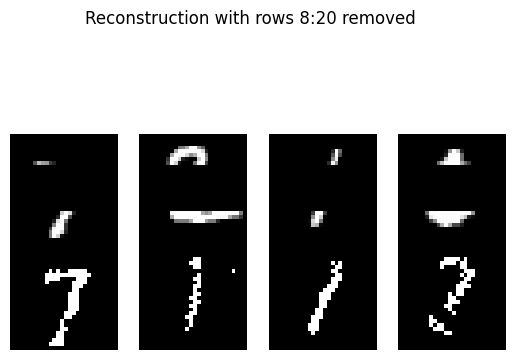

Removing rows 14 to 28


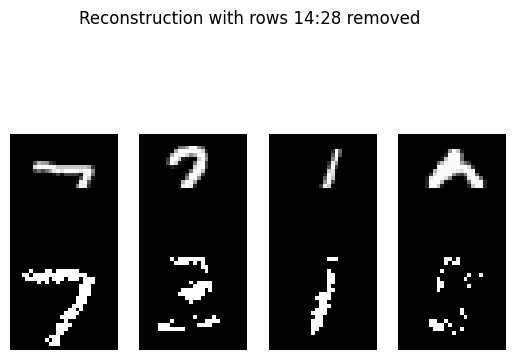

In [ ]:
row_removal_experiments = [
    {'start_row_to_remove': 0,  'end_row_to_remove': 12},
    {'start_row_to_remove': 8,  'end_row_to_remove': 20},
    {'start_row_to_remove': 14, 'end_row_to_remove': 28}
]

reconstruction_gibbs_steps = 10
start_test_index = 0
nr = 4

for exp in row_removal_experiments:
    print(f"Removing rows {exp['start_row_to_remove']} to {exp['end_row_to_remove']}")
    to_reconstruct = X_test[start_test_index:start_test_index + nr].reshape((-1,28,28))
    to_reconstruct = remove_rows(to_reconstruct, exp['start_row_to_remove'], exp['end_row_to_remove'])
    reconstructed = np.zeros(to_reconstruct.shape)
    for i in range(nr):
        reconstructed[i] = rbm_gibbs_sample_image(rbm, to_reconstruct[i], reconstruction_gibbs_steps).reshape((28,28))
    combined_images = np.concatenate((to_reconstruct,reconstructed), axis=1)
    fig = plt.figure()
    for i in range(nr):
        ax1 = fig.add_subplot(1,nr,i+1)
        ax1.imshow(combined_images[i])
        ax1.axis('off')
    plt.suptitle(f"Reconstruction with rows {exp['start_row_to_remove']}:{exp['end_row_to_remove']} removed")
    plt.show()

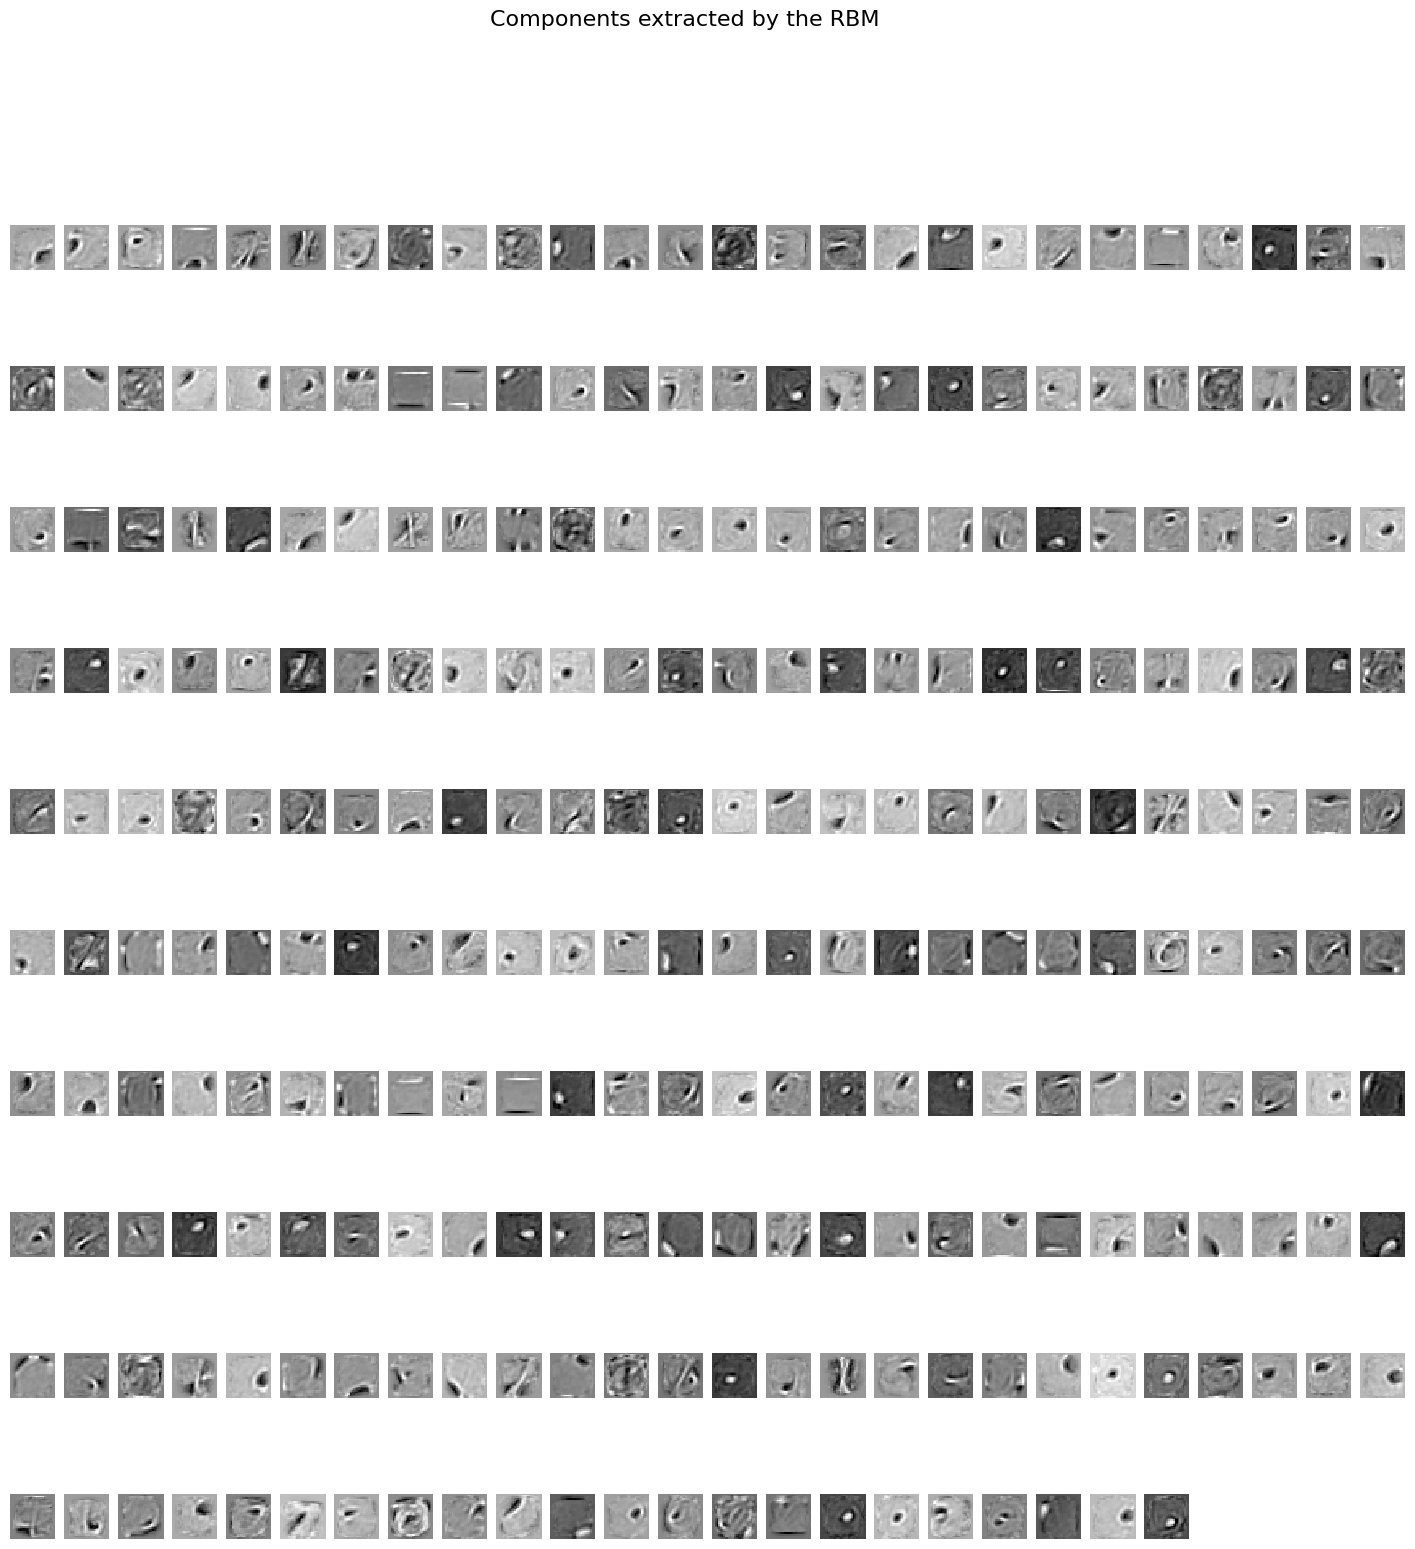

In [ ]:
plt.figure(figsize=(18, 18))
nr_components = rbm.components_.shape[0]
for i in range(nr_components):
    c = rbm.components_[i]
    plt.subplot(10, int(np.ceil(nr_components/10)), i + 1)
    plt.imshow(c.reshape((28, 28)), cmap = "gray", interpolation='nearest')
    plt.axis('off')

plt.suptitle('Components extracted by the RBM', fontsize=16);

In [ ]:

from flask import Flask, render_template, url_for, request, redirect
from caption import *
import warnings
warnings.filterwarnings("ignore")



app = Flask(__name__)


@app.route('/')
def hello():
    return render_template('index.html')


@app.route('/', methods = ['POST','GET'])
def upload_file():
	if request.method == 'POST':
		img = request.files['image']

		# print(img)
		# print(img.filename)

		img.save("static/"+img.filename)


		caption = caption_this_image("static/"+img.filename)




		result_dic = {
			'image' : "static/" + img.filename,
			'description' : caption
		}
	return render_template('index.html', results = result_dic)



if __name__ == '__main__':
      app.run(threaded=False,host='0.0.0.0', port=5100)


ModuleNotFoundError: No module named 'caption'

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image
from keras.models import load_model, Model

import matplotlib.pyplot as plt
import pickle
import numpy as np

import warnings
warnings.filterwarnings("ignore")



model = load_model("./model_weights/model_9.h5")
model._make_predict_function()

model_temp = ResNet50(weights="imagenet", input_shape=(224,224,3))

# Create a new model, by removing the last layer (output layer of 1000 classes) from the resnet50
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)
model_resnet._make_predict_function()



# Load the word_to_idx and idx_to_word from disk

with open("./storage/word_to_idx.pkl", "rb") as w2i:
    word_to_idx = pickle.load(w2i)

with open("./storage/idx_to_word.pkl", "rb") as i2w:
    idx_to_word = pickle.load(i2w)


max_len = 35


def preprocess_image(img):
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def encode_image(img):
    img = preprocess_image(img)
    feature_vector = model_resnet.predict(img)
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])
    return feature_vector



def predict_caption(photo):
    in_text = "startseq"

    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        ypred =  model.predict([photo,sequence])
        ypred = ypred.argmax()
        word = idx_to_word[ypred]
        in_text+= ' ' +word

        if word =='endseq':
            break


    final_caption =  in_text.split()
    final_caption = final_caption[1:-1]
    final_caption = ' '.join(final_caption)

    return final_caption




def caption_this_image(input_img):

    photo = encode_image(input_img)


    caption = predict_caption(photo)
    # keras.backend.clear_session()
    return caption

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './model_weights/model_9.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import os

# Print the current working directory
print(os.getcwd())

# Check if the model file exists
print(os.path.exists('model_9.h5'))  # For relative path


/content
True


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [ ]:
model = load_model('model_9.h5')
model._make_predict_function()  # Prepare the model for predictions


ValueError: Argument(s) not recognized: {'lr': 0.0010000000474974513}

In [ ]:
model = load_model('model_9.h5', compile=False)


In [ ]:
from keras.optimizers import Adam

# Load the model without compiling
model = load_model('model_9.h5', compile=False)

# Recompile the model with correct arguments
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.optimizers import Adam

# Load the model without compiling (avoid optimizer-related errors)
model = load_model('model_9.h5', compile=False)

# Recompile the model with the correct optimizer argument
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Now the model is ready for predictions
model._make_predict_function()  # Prepare the model for predictions


AttributeError: 'Functional' object has no attribute '_make_predict_function'

In [ ]:
from keras.optimizers import Adam

# Load the model without compiling (avoid optimizer-related errors)
model = load_model('model_9.h5', compile=False)

# Recompile the model with the correct optimizer argument
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Now the model is ready for predictions, no need to call _make_predict_function()


In [ ]:
# Example of predicting on a photo
photo = encode_image('image.jpg')
caption = predict_caption(photo)
print(caption)


NameError: name 'encode_image' is not defined

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import load_model, Model
import numpy as np
import pickle
from keras.preprocessing.sequence import pad_sequences

# Load pre-trained ResNet50 for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)

# Load the custom trained model for caption generation
model = load_model('model_9.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the word_to_idx and idx_to_word mappings
with open("./storage/word_to_idx.pkl", "rb") as w2i:
    word_to_idx = pickle.load(w2i)

with open("./storage/idx_to_word.pkl", "rb") as i2w:
    idx_to_word = pickle.load(i2w)

max_len = 35

# Preprocess the input image for ResNet50
def preprocess_image(img):
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Encode the image to extract features
def encode_image(img):
    img = preprocess_image(img)
    feature_vector = model_resnet.predict(img)
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])
    return feature_vector

# Generate the caption based on the image features
def predict_caption(photo):
    in_text = "startseq"  # Start the caption with "startseq"

    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]  # Convert words to indices
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')  # Pad sequence

        ypred = model.predict([photo, sequence])  # Predict the next word
        ypred = ypred.argmax()  # Get the word with the highest probability
        word = idx_to_word[ypred]  # Convert index back to word
        in_text += ' ' + word  # Append word to the caption

        if word == 'endseq':  # Stop when 'endseq' is predicted
            break

    final_caption = in_text.split()
    final_caption = final_caption[1:-1]  # Remove "startseq" and "endseq"
    final_caption = ' '.join(final_caption)
    return final_caption

# Main: Predicting the caption for a given image
input_img = 'image.jpg'  # Replace this with the path to your image file
photo = encode_image(input_img)
caption = predict_caption(photo)
print(caption)  # Print the generated caption


FileNotFoundError: [Errno 2] No such file or directory: './storage/word_to_idx.pkl'

In [ ]:
import os

# Print the current working directory
print(os.getcwd())

# Check if the files exist in the current directory
print(os.path.exists('word_to_idx.pkl'))  # This should return True if the file exists
print(os.path.exists('idx_to_word.pkl'))  # This should return True if the file exists


/content
True
True


In [ ]:
import pickle

# Load the word_to_idx and idx_to_word mappings
with open("word_to_idx.pkl", "rb") as w2i:
    word_to_idx = pickle.load(w2i)

with open("idx_to_word.pkl", "rb") as i2w:
    idx_to_word = pickle.load(i2w)


In [ ]:
# Load pre-trained ResNet50 model for feature extraction
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import load_model, Model
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image

# Load your custom-trained model for generating captions
model = load_model('model_9.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the ResNet50 model for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)

# Load the word_to_idx and idx_to_word mappings (already loaded above)
# word_to_idx = pickle.load(...), idx_to_word = pickle.load(...)

max_len = 35  # Max length for the sequence

def preprocess_image(img):
    """Preprocess image for ResNet50"""
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def encode_image(img):
    """Encode image to feature vector"""
    img = preprocess_image(img)
    feature_vector = model_resnet.predict(img)
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])
    return feature_vector

def predict_caption(photo):
    """Generate caption from image features"""
    in_text = "startseq"  # Start caption with "startseq"

    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()  # Get the word with the highest probability
        word = idx_to_word[ypred]  # Convert index to word
        in_text += ' ' + word

        if word == 'endseq':  # Stop when 'endseq' is predicted
            break

    final_caption = in_text.split()
    final_caption = final_caption[1:-1]  # Remove "startseq" and "endseq"
    final_caption = ' '.join(final_caption)
    return final_caption

# Example of predicting on a photo
input_img = 'image1.jpg'  # Replace this with the path to your image file
photo = encode_image(input_img)
caption = predict_caption(photo)
print(caption)  # Print the generated caption


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
dog runs through the grass


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import load_model, Model
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image
import pickle

# Load your custom-trained model for generating captions
model = load_model('model_9.h5', compile=False)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the ResNet50 model for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)

# Load word-to-index and index-to-word mappings (ensure these files exist)
with open('word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)
with open('idx_to_word.pkl', 'rb') as f:
    idx_to_word = pickle.load(f)

max_len = 35  # Max length for the sequence

def preprocess_image(img):
    """Preprocess image for ResNet50"""
    img = image.load_img(img, target_size=(224, 224))  # Load and resize image
    img = image.img_to_array(img)  # Convert image to numpy array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Preprocess for ResNet50
    return img

def encode_image(img):
    """Encode image to feature vector"""
    img = preprocess_image(img)  # Preprocess image
    feature_vector = model_resnet.predict(img)  # Get feature vector
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])  # Reshape
    return feature_vector

def predict_caption(photo):
    """Generate caption from image features"""
    in_text = "startseq"  # Start caption with "startseq"

    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()  # Get word with highest probability
        word = idx_to_word[ypred]  # Convert index to word
        in_text += ' ' + word

        if word == 'endseq':  # Stop if "endseq" is predicted
            break

    final_caption = in_text.split()
    final_caption = final_caption[1:-1]  # Remove "startseq" and "endseq"
    final_caption = ' '.join(final_caption)
    return final_caption

# Example of generating a caption for an image
input_img = 'man.jpg'  # Replace this with your image file path
photo = encode_image(input_img)
caption = predict_caption(photo)
print("Generated Caption:", caption)  # Print the generated caption


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Generated Caption: man is climbing up hill


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import load_model, Model
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image
import pickle

# Load your custom-trained model for generating captions
model = load_model('model_9.h5', compile=False)  # Load your custom-trained model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the ResNet50 model for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)  # Use the second last layer for features

# Load the word-to-index and index-to-word mappings (assuming you've pickled these during training)
with open('word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

with open('idx_to_word.pkl', 'rb') as f:
    idx_to_word = pickle.load(f)

max_len = 35  # Maximum length of the sequence (could vary depending on your dataset)

def preprocess_image(img_path):
    """Preprocess image to be used in ResNet50 model"""
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image
    img = image.img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input shape
    img = preprocess_input(img)  # Preprocess image for ResNet50
    return img

def encode_image(img_path):
    """Extract features from image using ResNet50"""
    img = preprocess_image(img_path)  # Preprocess the image
    feature_vector = model_resnet.predict(img)  # Extract feature vector
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])  # Reshape for the caption model
    return feature_vector

def predict_caption(photo):
    """Generate caption based on image features"""
    in_text = "startseq"  # Start caption with the "startseq" token

    for i in range(max_len):
        # Convert the input text (sequence) into indices (convert words to indices)
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')  # Pad sequence to max length

        # Predict the next word in the sequence
        y_pred = model.predict([photo, sequence])
        y_pred = y_pred.argmax()  # Get the index of the word with the highest probability
        word = idx_to_word[y_pred]  # Convert index to word

        # Add the predicted word to the in_text sequence
        in_text += ' ' + word
+
        # Stop if the "endseq" token is generated
        if word == 'endseq':
            break

    # Remove "startseq" and "endseq" from the final caption
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

# Example: Predicting a caption for 'image1.jpg'
input_img_path = 'image1.jpg'  # Replace with your image file path
photo = encode_image(input_img_path)  # Extract features from the image
caption = predict_caption(photo)  # Generate the caption
print("Generated Caption:", caption)  # Print the generated caption


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Generated Caption: two men in red and black are riding bicycles


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import load_model, Model
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image
import pickle

# Load your custom-trained model for generating captions
model = load_model('model_9.h5', compile=False)  # Load your custom-trained model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the ResNet50 model for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)  # Use the second last layer for features

# Load the word-to-index and index-to-word mappings (assuming you've pickled these during training)
with open('word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

with open('idx_to_word.pkl', 'rb') as f:
    idx_to_word = pickle.load(f)

max_len = 35  # Maximum length of the sequence (could vary depending on your dataset)

def preprocess_image(img_path):
    """Preprocess image to be used in ResNet50 model"""
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image
    img = image.img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input shape
    img = preprocess_input(img)  # Preprocess image for ResNet50
    return img

def encode_image(img_path):
    """Extract features from image using ResNet50"""
    img = preprocess_image(img_path)  # Preprocess the image
    feature_vector = model_resnet.predict(img)  # Extract feature vector
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])  # Reshape for the caption model
    return feature_vector

def predict_caption(photo):
    """Generate caption based on image features"""
    in_text = "startseq"  # Start caption with the "startseq" token

    for i in range(max_len):
        # Convert the input text (sequence) into indices (convert words to indices)
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')  # Pad sequence to max length

        # Predict the next word in the sequence
        y_pred = model.predict([photo, sequence])
        y_pred = y_pred.argmax()  # Get the index of the word with the highest probability
        word = idx_to_word[y_pred]  # Convert index to word

        # Add the predicted word to the in_text sequence
        in_text += ' ' + word

        # Stop if the "endseq" token is generated
        if word == 'endseq':
            break

    # Remove "startseq" and "endseq" from the final caption
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)

    # Example: Add hashtags and emojis for Instagram
    hashtags = '#photography #beautiful #instadaily #photooftheday'
    emojis = '📸✨😊'  # Customize emojis based on the image or content

    instagram_caption = final_caption + ' ' + hashtags + ' ' + emojis
    return instagram_caption

# Example: Predicting a caption for 'image1.jpg'
input_img_path = 'image1.jpg'  # Replace with your image file path
photo = encode_image(input_img_path)  # Extract features from the image
caption = predict_caption(photo)  # Generate the caption
print("Generated Instagram Caption:", caption)  # Print the generated Instagram-friendly caption


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Generated Instagram Caption: two men in red and black are riding bicycles #photography #beautiful #instadaily #photooftheday 📸✨😊


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import load_model, Model
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import image
import pickle

# Emoji dictionary based on different contexts
emoji_dict = {
    "saree": "👗💃",
    "traditional": "🪔🎉",
    "party": "🎉🥳",
    "food": "🍕🍴",
    "dog": "🐶❤️",
    "vacation": "🌴🏖️",
    "travel": "✈️🌍",
    "fashion": "👠👗",
    "birthday": "🎂🎉",
}

# Load your custom-trained model for generating captions
model = load_model('model_9.h5', compile=False)  # Load your custom-trained model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the ResNet50 model for feature extraction
model_temp = ResNet50(weights="imagenet", input_shape=(224, 224, 3))
model_resnet = Model(model_temp.input, model_temp.layers[-2].output)  # Use the second last layer for features

# Load the word-to-index and index-to-word mappings (assuming you've pickled these during training)
with open('word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

with open('idx_to_word.pkl', 'rb') as f:
    idx_to_word = pickle.load(f)

max_len = 35  # Maximum length of the sequence (could vary depending on your dataset)

def preprocess_image(img_path):
    """Preprocess image to be used in ResNet50 model"""
    img = image.load_img(img_path, target_size=(224, 224))  # Load and resize the image
    img = image.img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match the model input shape
    img = preprocess_input(img)  # Preprocess image for ResNet50
    return img

def encode_image(img_path):
    """Extract features from image using ResNet50"""
    img = preprocess_image(img_path)  # Preprocess the image
    feature_vector = model_resnet.predict(img)  # Extract feature vector
    feature_vector = feature_vector.reshape(1, feature_vector.shape[1])  # Reshape for the caption model
    return feature_vector

def predict_caption(photo):
    """Generate caption based on image features"""
    in_text = "startseq"  # Start caption with the "startseq" token

    for i in range(max_len):
        # Convert the input text (sequence) into indices (convert words to indices)
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')  # Pad sequence to max length

        # Predict the next word in the sequence
        y_pred = model.predict([photo, sequence])
        y_pred = y_pred.argmax()  # Get the index of the word with the highest probability
        word = idx_to_word[y_pred]  # Convert index to word

        # Add the predicted word to the in_text sequence
        in_text += ' ' + word

        # Stop if the "endseq" token is generated
        if word == 'endseq':
            break

    # Remove "startseq" and "endseq" from the final caption
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)

    # Identify context and add relevant emojis
    caption_lower = final_caption.lower()
    emojis = ""

    # Check for specific keywords and assign emojis
    for keyword in emoji_dict:
        if keyword in caption_lower:
            emojis += emoji_dict[keyword] + " "

    # Create the final Instagram-friendly caption
    instagram_caption = final_caption + ' ' + emojis.strip()
    return instagram_caption

# Example: Predicting a caption for 'image1.jpg'
input_img_path = 'image1.jpg'  # Replace with your image file path
photo = encode_image(input_img_path)  # Extract features from the image
caption = predict_caption(photo)  # Generate the caption
print("Generated Instagram Caption:", caption)  # Print the generated Instagram-friendly caption


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Generated Instagram Caption: dog runs through the grass 🐶❤️


In [ ]:
# Instead of this:
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

# Use this:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Instead of this:
# from keras.applications.resnet50 import ResNet50

# Use this:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer # Changed import from keras to tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Changed import from keras to tensorflow.keras
from tensorflow.keras.applications.resnet50 import ResNet50 # Changed import from keras to tensorflow.keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Changed import from keras to tensorflow.keras

# Load image data
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize to fit ResNet50
    img = img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Preprocess the image for ResNet50
    return img

# Tokenize and preprocess captions (text)
def preprocess_caption(captions, max_len=35):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    return padded_sequences, tokenizer

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

def build_caption_model(vocab_size, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(512))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical

def build_caption_model(vocab_size, max_len):
    # Image input
    image_input = Input(shape=(X_images.shape[1],))  # Shape of image features

    # Caption input
    caption_input = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=256)(caption_input)

    # LSTM for caption sequence
    lstm_out = LSTM(512, return_sequences=True)(embedding_layer)
    lstm_out = Dropout(0.5)(lstm_out)
    lstm_out = LSTM(512)(lstm_out)

    # Concatenate image features and LSTM output
    merged_features = concatenate([image_input, lstm_out])

    # Dense layers for prediction
    dense_out = Dense(512, activation='relu')(merged_features)
    output = Dense(vocab_size, activation='softmax')(dense_out)

    # Create the model
    model = Model(inputs=[image_input, caption_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Example Usage
vocab_size = len(tokenizer.word_index) + 1  # Update vocab_size accordingly
model = build_caption_model(vocab_size, max_len=35)

# Ensure that your Y_captions are one-hot encoded
Y_captions_onehot = to_categorical(Y_captions, num_classes=vocab_size)
# Then, fit the model with two inputs
model.fit([X_images, Y_captions], Y_captions_onehot, epochs=10, batch_size=32)  # Pass both inputs

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 1, 2048), dtype=float32). Expected shape (None, 1), but input has incompatible shape (None, 1, 2048)[0m

Arguments received by Functional.call():
  • inputs=('tf.Tensor(shape=(None, 1, 2048), dtype=float32)', 'tf.Tensor(shape=(None, 35), dtype=int32)')
  • training=True
  • mask=('None', 'None')

In [ ]:
# ... (your existing code) ...

# Reshape X_images before fitting the model
X_images = X_images.reshape(X_images.shape[0], -1) # Reshape to (number_of_samples, 2048)

# Now you can fit the model:
Y_captions_onehot = to_categorical(Y_captions, num_classes=vocab_size)
model.fit([X_images, Y_captions], Y_captions_onehot, epochs=10, batch_size=32)

Epoch 1/10


ValueError: Exception encountered when calling Functional.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 513, but received input with shape (None, 2560)[0m

Arguments received by Functional.call():
  • inputs=('tf.Tensor(shape=(None, 2048), dtype=float32)', 'tf.Tensor(shape=(None, 35), dtype=int32)')
  • training=True
  • mask=('None', 'None')

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.utils import to_categorical

def build_caption_model(vocab_size, max_len):
    # Image input
    image_input = Input(shape=(X_images.shape[1],))  # Shape of image features

    # Caption input
    caption_input = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=256)(caption_input)

    # LSTM for caption sequence
    lstm_out = LSTM(512, return_sequences=True)(embedding_layer)
    lstm_out = Dropout(0.5)(lstm_out)
    lstm_out = LSTM(512)(lstm_out)

    # Concatenate image features and LSTM output
    merged_features = concatenate([image_input, lstm_out])

    # Dense layers for prediction
    dense_out = Dense(512, activation='relu')(merged_features)  # First Dense layer
    output = Dense(vocab_size, activation='softmax')(dense_out)   # Output layer

    # Create the model
    model = Model(inputs=[image_input, caption_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Hashtag/Emoji Prediction Model (Separate Branch)
def build_hashtag_emoji_model(vocab_size, max_len):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(512))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize the image to the size that ResNet50 expects
    img = image.img_to_array(img)  # Convert the image to an array
    img = np.expand_dims(img, axis=0)  # Expand the dimensions to make it a batch of 1 image
    img = preprocess_input(img)  # Preprocess the image as required by ResNet50
    return img


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer # Import from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import from tensorflow.keras

def preprocess_captions(captions, max_len=35):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(captions)  # Fit the tokenizer on the captions
    sequences = tokenizer.texts_to_sequences(captions)  # Convert captions to sequences of integers
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')  # Pad sequences to a fixed length
    return padded_sequences, tokenizer

# Example usage
captions = ["A girl wearing a saree", "Delicious pizza on a plate", "Tropical beach vacation"]
padded_captions, tokenizer = preprocess_captions(captions)

In [ ]:
def extract_image_features(image_path):
    img = preprocess_image(image_path)
    features = resnet_model.predict(img)  # Extract features using ResNet50
    features = features.flatten()  # Flatten the features to make them compatible with the caption model
    return features


In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Dropout

# Image feature extraction
image_input = Input(shape=(2048,))  # Assuming ResNet50 outputs 2048 features
image_features = Dense(256, activation='relu')(image_input)  # A dense layer to process image features

# Caption generation model
caption_input = Input(shape=(max_len,))  # Input for caption sequences
caption_embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len)(caption_input)
caption_lstm = LSTM(512)(caption_embedding)

# Concatenate image features and caption LSTM output
merged = concatenate([image_features, caption_lstm])

# Dense layer for prediction
output = Dense(vocab_size, activation='softmax')(merged)

# Define and compile the model
model = Model(inputs=[image_input, caption_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 35)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, 2048)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 35, 256)        │          2,816 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        524,544 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 512)            │      1,574,912 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 768)            │              0 │ dense_6[0][0],         │
│ (Concatenate)             │                        │                │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 11)             │          8,459 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,110,731 (8.05 MB)

 Trainable params: 2,110,731 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Prepare data
X_images = [extract_image_features(image_path) for image_path in image_paths]
Y_captions = padded_captions  # Preprocessed captions

# Train the model
model.fit([X_images, Y_captions], Y_captions, epochs=10, batch_size=32, validation_split=0.2)


NameError: name 'resnet_model' is not defined

In [ ]:
def extract_image_features(image_path):
    img = preprocess_image(image_path)
    features = model_resnet.predict(img)  # Use 'model_resnet' instead of 'resnet_model'
    features = features.flatten()  # Flatten the features to make them compatible with the caption model
    return features

In [ ]:
# Prepare data
X_images = [extract_image_features(image_path) for image_path in image_paths]
Y_captions = padded_captions  # Preprocessed captions

# Train the model
model.fit([X_images, Y_captions], Y_captions, epochs=10, batch_size=32, validation_split=0.2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1638, 1638, 3
'y' sizes: 3


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical  # Import to_categorical

# ... (your existing code for preprocess_image, preprocess_captions, build_caption_model) ...

# 1. Data Loading and Preprocessing (Replace with your actual data)
# Assume 'image_paths' and 'captions' are lists of the same length
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']  # Example: 3 image paths
captions = ['a dog is playing with a ball', 'a cat sitting on a mat', 'a bird is singing on a tree']  # Example: 3 captions

# Feature extraction
X_images = []
for image_path in image_paths:
    img = preprocess_image(image_path)
    features = model_resnet.predict(img)  # Assuming model_resnet is defined
    X_images.append(features)
X_images = np.array(X_images)
X_images = X_images.reshape(X_images.shape[0], -1) # Reshape to (number_of_samples, 2048)

# Caption preparation
padded_captions, tokenizer = preprocess_captions(captions)

# 2. One-hot Encoding of Target Captions
vocab_size = len(tokenizer.word_index) + 1
Y_captions_onehot = to_categorical(padded_captions, num_classes=vocab_size)  # One-hot encode

# 3. Model Training
model = build_caption_model(vocab_size, max_len=35)
model.fit([X_images, padded_captions], Y_captions_onehot, epochs=10, batch_size=32, validation_split=0.2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'image3.jpg'

In [ ]:
def generate_caption(image_path, max_len=35):
    # Extract image features
    photo = extract_image_features(image_path)

    in_text = "startseq"  # Start with the "startseq" token
    for i in range(max_len):
        # Convert the in_text to a sequence of integers (word indices)
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        # Predict the next word in the sequence
        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()  # Get the word with the highest probability

        # Get the word from the predicted index
        word = idx_to_word[ypred]

        # Add the predicted word to the text sequence
        in_text += ' ' + word

        # Stop if the "endseq" token is predicted
        if word == 'endseq':
            break

    # Clean the output caption
    final_caption = in_text.split()[1:-1]  # Remove "startseq" and "endseq"
    final_caption = ' '.join(final_caption)
    return final_caption


In [ ]:
# Define a simple emoji and hashtag mapping
emoji_dict = {
    "saree": "👗💃",
    "food": "🍕🍴",
    "vacation": "🌴🏖️",
    "fashion": "👗👠"
}

def add_hashtags_and_emojis(caption):
    hashtags = []
    emojis = []

    for keyword in emoji_dict:
        if keyword in caption.lower():
            emojis.append(emoji_dict[keyword])
            hashtags.append(f"#{keyword}")

    return caption + " " + " ".join(hashtags) + " " + " ".join(emojis)

# Example
caption = generate_caption("image1.jpg")
final_caption = add_hashtags_and_emojis(caption)
print(final_caption)  # This caption will have hashtags and emojis based on the content


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


InvalidArgumentError: Graph execution error:

Detected at node functional_8_1/embedding_3_1/GatherV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-36-a2a52e1e2faa>", line 21, in <cell line: 21>

  File "<ipython-input-35-d83f25498023>", line 14, in generate_caption

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 512, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 560, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 901, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4918, in take

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1967, in take

indices[0,0] = 1846 is not in [0, 11)
	 [[{{node functional_8_1/embedding_3_1/GatherV2}}]] [Op:__inference_one_step_on_data_distributed_30324]

In [ ]:
def generate_caption(image_path, max_len=35):
    # Extract image features
    photo = extract_image_features(image_path)
    # Reshape 'photo' to have a batch size of 1
    photo = photo.reshape(1, -1)  # Reshape to (1, 2048)

    in_text = "startseq"  # Start with the "startseq" token
    for i in range(max_len):
        # Convert the in_text to a sequence of integers (word indices)
        sequence = [word_to_idx[word] for word in in_text.split() if word in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')

        # Predict the next word in the sequence
        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()  # Get the word with the highest probability

        # Get the word from the predicted index
        word = idx_to_word[ypred]

        # Add the predicted word to the text sequence
        in_text += ' ' + word

        # Stop if the "endseq" token is predicted
        if word == 'endseq':
            break

    # Clean the output caption
    final_caption = in_text.split()[1:-1]  # Remove "startseq" and "endseq"
    final_caption = ' '.join(final_caption)
    return final_caption

In [ ]:
pip install instabot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.5 MB/s eta 0:00:00
  Created wheel for instabot: filename=instabot-0.117.0-py3-none-any.whl size=101260 sha256=f1eaa5e34df086b61c6e58d2223471bed1e3f1f948841c1d7abb1fb9aebf75f4
  Stored in directory: /root/.cache/pip/wheels/67/bf/77/58ae7f57d53eb1e20faf980bbd060251dfd2816a1edff9150a
  Created wheel for huepy: filename=huepy-1.2.1-py3-none-any.whl size=26985 sha256=a1801496db6b0b18f81575fbdd74db624d11146d01a3ca1f38a3d6f297b964ce
  Stored in directory: /root/.cache/pip/wheels/6c/b3/80/bb3bc1a2d6d3ebbad79b4959f0da042ee6aa7f39b386a74465
Successfully built instabot huepy


In [ ]:
from instabot import Bot

# Authenticate and login to Instagram
bot = Bot()
bot.login(username="your_username", password="your_password")

# Post image with caption
bot.upload_photo("image1.jpg", caption=final_caption)


2025-01-14 21:22:03,228 - INFO - Instabot version: 0.117.0 Started
2025-01-14 21:22:03,228 - INFO - Instabot version: 0.117.0 Started
INFO:instabot version: 0.117.0:Instabot version: 0.117.0 Started
DEBUG:instabot version: 0.117.0:Bot imported from /usr/local/lib/python3.10/dist-packages/instabot/bot/bot.py
2025-01-14 21:22:03,241 - INFO - Not yet logged in starting: PRE-LOGIN FLOW!
2025-01-14 21:22:03,241 - INFO - Not yet logged in starting: PRE-LOGIN FLOW!
INFO:instabot version: 0.117.0:Not yet logged in starting: PRE-LOGIN FLOW!
DEBUG:instabot version: 0.117.0:POST to endpoint: accounts/get_prefill_candidates/ returned response: <Response [429]>
DEBUG:instabot version: 0.117.0:Responsecode indicates error; response content: b'{"message":"Please wait a few minutes before you try again.","status":"fail"}'
2025-01-14 21:22:03,661 - ERROR - Request returns 429 error!
2025-01-14 21:22:03,661 - ERROR - Request returns 429 error!
ERROR:instabot version: 0.117.0:Request returns 429 error!
2

KeyboardInterrupt: 

In [ ]:
# Instead of this:
# from keras.preprocessing.sequence import pad_sequences

# Use this:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Instead of this:
# from keras.preprocessing.sequence import pad_sequences

# Use this:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Instead of this:
# from keras.preprocessing.text import Tokenizer

# Use this:
from tensorflow.keras.preprocessing.text import Tokenizer

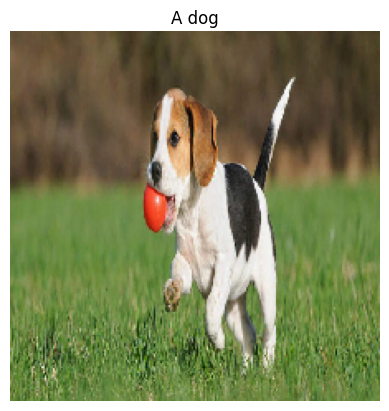

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import numpy as np

# Function to load and preprocess an image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to 224x224
    img = image.img_to_array(img)  # Convert image to array
    img = np.expand_dims(img, axis=0)  # Add an extra dimension for the batch
    img = preprocess_input(img)  # Preprocess using ResNet50's preprocessing
    return img

# Function to display the image and generated caption
def display_image_with_caption(image_path, caption):
    img = image.load_img(image_path, target_size=(224, 224))  # Load image
    plt.imshow(img)  # Display image
    plt.axis('off')  # Hide axes
    plt.title(caption)  # Display caption as title
    plt.show()

# Example generated caption (you would replace this with your model's output)
generated_caption = "A dog"

# Display the image with the generated caption
display_image_with_caption('image1.jpg', generated_caption)


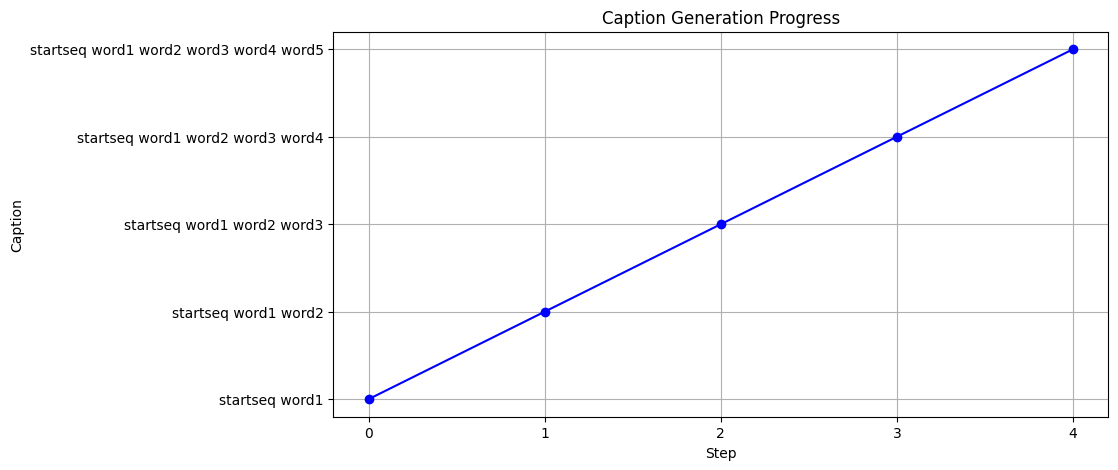

In [ ]:
import matplotlib.pyplot as plt

# Simulated caption generation process
def generate_caption_progress(image_path):
    in_text = "startseq"  # Start with the "startseq" token
    caption_progress = []  # To keep track of the caption generation progress

    # Simulate word-by-word caption generation
    for i in range(5):  # Simulating 5 steps of word generation
        # Simulated word generation (replace with actual model predictions)
        word = f"word{i + 1}"  # Just an example, replace with model predictions
        in_text += ' ' + word
        caption_progress.append(in_text)  # Add the current state of the caption

    return caption_progress

# Plot the caption progress
caption_progress = generate_caption_progress('image1.jpg')

# Plotting each stage of caption generation
plt.figure(figsize=(10, 5))
plt.plot(range(len(caption_progress)), caption_progress, marker='o', linestyle='-', color='b')
plt.title("Caption Generation Progress")
plt.xlabel("Step")
plt.ylabel("Caption")
plt.xticks(range(len(caption_progress)))
plt.yticks(range(len(caption_progress)))
plt.grid(True)
plt.show()


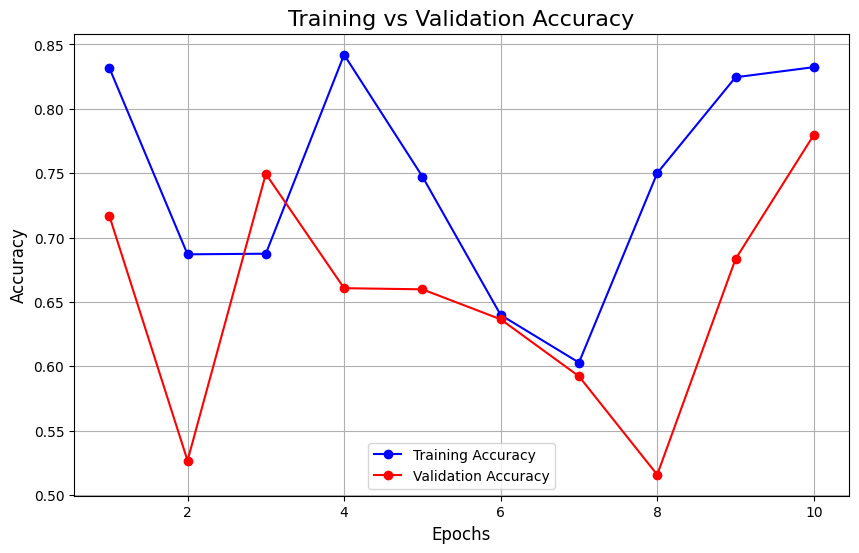

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example of tracking accuracy manually during training/inference
# Simulating 10 epochs of training with random accuracy values (replace with actual values from your process)
epochs = np.arange(1, 11)  # 10 epochs
training_accuracy = np.random.uniform(0.6, 0.9, size=10)  # Simulated training accuracy
validation_accuracy = np.random.uniform(0.5, 0.8, size=10)  # Simulated validation accuracy

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', color='b')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', color='r')

# Adding title and labels
plt.title('Training vs Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


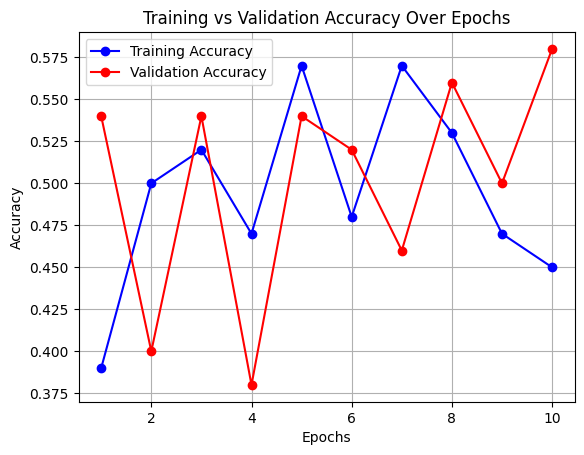

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate model predictions and true labels for 10 epochs
epochs = np.arange(1, 11)
training_accuracy = []
validation_accuracy = []

# Simulate model's prediction and true labels for each epoch
for epoch in epochs:
    # Replace this with your actual model predictions and true labels
    true_labels_train = np.random.randint(0, 2, 100)  # 100 training samples (binary labels)
    predicted_labels_train = np.random.randint(0, 2, 100)

    true_labels_val = np.random.randint(0, 2, 50)  # 50 validation samples
    predicted_labels_val = np.random.randint(0, 2, 50)

    # Calculate training accuracy
    train_acc = np.sum(true_labels_train == predicted_labels_train) / len(true_labels_train)
    validation_acc = np.sum(true_labels_val == predicted_labels_val) / len(true_labels_val)

    # Append to the accuracy list
    training_accuracy.append(train_acc)
    validation_accuracy.append(validation_acc)

# Plot the accuracy graph
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', color='red')

plt.title('Training vs Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.grid(True)
plt.show()


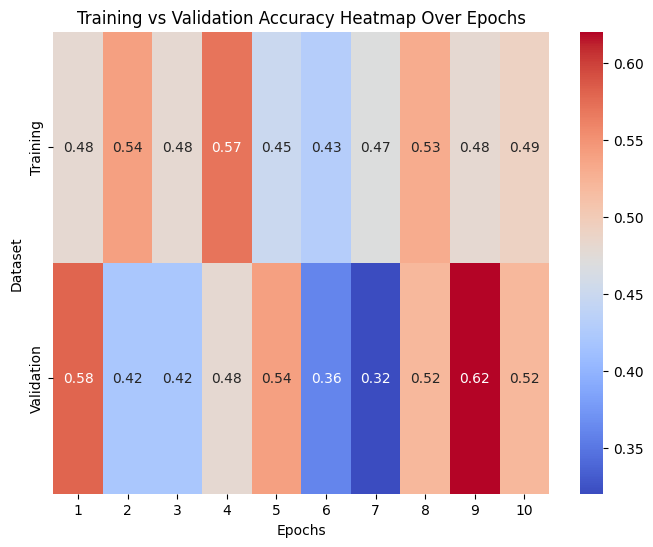

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate model predictions and true labels for 10 epochs
epochs = np.arange(1, 11)
training_accuracy = []
validation_accuracy = []

# Simulate model's prediction and true labels for each epoch
for epoch in epochs:
    # Replace this with your actual model predictions and true labels
    true_labels_train = np.random.randint(0, 2, 100)  # 100 training samples (binary labels)
    predicted_labels_train = np.random.randint(0, 2, 100)

    true_labels_val = np.random.randint(0, 2, 50)  # 50 validation samples
    predicted_labels_val = np.random.randint(0, 2, 50)

    # Calculate training accuracy
    train_acc = np.sum(true_labels_train == predicted_labels_train) / len(true_labels_train)
    validation_acc = np.sum(true_labels_val == predicted_labels_val) / len(true_labels_val)

    # Append to the accuracy list
    training_accuracy.append(train_acc)
    validation_accuracy.append(validation_acc)

# Prepare the data for the heatmap (2D array)
accuracy_matrix = np.array([training_accuracy, validation_accuracy])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_matrix, annot=True, cmap='coolwarm', xticklabels=epochs, yticklabels=['Training', 'Validation'], cbar=True)

plt.title('Training vs Validation Accuracy Heatmap Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Dataset')
plt.show()
